<a href="https://colab.research.google.com/github/IA2122/practica-6-paochoa/blob/main/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 6: Aprendizaje supervisado II

Esta práctica tiene como objetivos:
- Evaluar algoritmos de clasificación.
- Ajustar hiperparámetros.

Además de este notebook tienes dos notebooks con ejercicios adicionales.  

## Evaluando la clasificación binaria

Empieza ejecutando el siguiente comando para que no se muestren los warnings. 

In [1]:
import warnings; warnings.simplefilter('ignore')

### 0. Carga de datos

Descarga el fichero de pima-indians-diabetes como realizamos en prácticas anteriores. 

In [2]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv -O pima-indians-diabetes.csv

--2022-04-06 13:04:22--  https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2022-04-06 13:04:22 (14.0 MB/s) - ‘pima-indians-diabetes.csv’ saved [23279/23279]



In [3]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv',header=None)

##### Ejercicio
Carga los datos del fichero pima-indians-diabetes.csv utilizando la librería pandas como hicimos en prácticas anteriores. Almacena los vectores de descriptores en una variable X y las etiquetas en una variable Y.

In [4]:
X =  df.values[:,:-1]
Y =  df.values[:,-1]

### 1. Partición de conjunto de entrenamiento y test

Como vimos en clase es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función train_test_split de la librería sklearn.

In [5]:
from sklearn.model_selection import train_test_split

A la función train_test_split le vamos a pasar 4 parámetros:
  - las instancias de nuestro dataset (sin etiqueta), es decir X,
  - las etiquetas (es decir Y),
  - el porcentage del dataset que se utilizará para el conjunto de test
    (en este caso 0.25).
  - el estado aleatorio: un número para poder reproducir los resultados.
  
El resultado devuelto por la función es una tupla de 4 elementos que contiene el conjunto de entrenamiento, el conjunto de test, las etiquetas  del conjunto de entrenamiento y las etiquetas del conjunto de test.

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

##### Ejercicio
Carga las distintas librerías que son necesarias para los clasificadores definidos en la práctica 5. En concreto vas a construir clasificadores utilizando los algoritmos:
 - KNN
 - Árboles de decisión
 - Regresión logística
 - SVM
 - Redes neuronales

In [7]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=6)
modelKNN.fit(trainData, trainLabels)
modelKNN.predict(testData)

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [8]:
from sklearn.tree import DecisionTreeClassifier
modelArbol = DecisionTreeClassifier(random_state=84)
modelArbol.fit(trainData, trainLabels)
modelArbol.predict(testData)

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [9]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=84)
modelLR.fit(trainData, trainLabels)
modelLR.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0.])

In [10]:
from sklearn.svm import SVC
modelSVMLineal = SVC(kernel="linear")
modelSVMLineal.fit(trainData, trainLabels)
modelSVMLineal.predict(testData)

array([0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0.])

In [11]:
modelSVMSigmoid = SVC(kernel="sigmoid", gamma = 2, coef0 = 1)
modelSVMSigmoid.fit(trainData, trainLabels)
modelSVMSigmoid.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [12]:
from sklearn.linear_model import Perceptron
modelPerceptron = Perceptron(max_iter=10,eta0=1.0,random_state=84)
modelPerceptron.fit(trainData,trainLabels)
modelPerceptron.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [13]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(5,5),learning_rate_init=0.2,momentum=0.99)
modelMultiLayerPerceptron.fit(trainData,trainLabels)
modelMultiLayerPerceptron.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

#### 2.1.  Validación manual (holdout)

La primera alternativa para seleccionar los hiperparámetros consiste en reservar una parte de las instancias del training set para validación, y probar distintos hiperparámetros de manera manual para ver cuál es la mejor solución con cada uno de ellos. Para ello utilizamos de nuevo la función `train_test_split`.

In [14]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
                                                                test_size=0.1, random_state=84)

**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1  y 25.

In [15]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=67.24%
k=3, precisión=77.59%
k=5, precisión=74.14%
k=7, precisión=77.59%
k=9, precisión=75.86%
k=11, precisión=74.14%
k=13, precisión=74.14%
k=15, precisión=74.14%
k=17, precisión=75.86%
k=19, precisión=75.86%
k=21, precisión=75.86%
k=23, precisión=74.14%
k=25, precisión=75.86%


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

Respuesta.

La obtenemos con 3 o 7 vecinos

**Árboles de decisión**

Repite lo mismo visto para KNN para los árboles de decisión con el hiperparámetro min_samples_split con valores entre 2 y 10 avanzando de 1 en 1. Puedes ver lo que hace este hiperparámetro en la [documentación de sklearn](http://scikit-learn.org/stable/modules/tree.html).


In [16]:
for n in range(2,11,1):
    modelArbol = DecisionTreeClassifier(random_state=84, min_samples_split=n)
    modelArbol.fit(trainData, trainLabels)
    score = modelArbol.score(valData,valLabels)
    print("n=%d, precisión=%.2f%%" % (n, score * 100))


n=2, precisión=62.07%
n=3, precisión=58.62%
n=4, precisión=62.07%
n=5, precisión=62.07%
n=6, precisión=62.07%
n=7, precisión=63.79%
n=8, precisión=62.07%
n=9, precisión=62.07%
n=10, precisión=62.07%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de min_samples_split obtenemos mejor precisión?


Respuesta.

La mejor precisión se obtiene con min_samples_split = 7

**Regresión logística**

Repite lo mismo visto para KNN para la regresión logística con C tomando los valores 0.1,1,10,100, y 1000.

In [17]:
for c in [0.1, 1, 10, 100, 1000]:
    modelLR = LogisticRegression(random_state=84, C= c)
    modelLR.fit(trainData, trainLabels)
    score = modelLR.score(valData,valLabels)
    print("c=%.2f, precisión=%.2f%%" % (c, score * 100))

c=0.10, precisión=74.14%
c=1.00, precisión=72.41%
c=10.00, precisión=72.41%
c=100.00, precisión=70.69%
c=1000.00, precisión=72.41%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de C obtenemos mejor precisión?


Respuesta. 

El mejor lo obtenemos con c = 0.1

#### 2.2. 10-fold cross validation 

Una alternativa al método anterior donde hacemos la separación del training set en training y validation de manera manual, consiste en utilizar el k-fold cross validation. Existen distintas alternativas para el k-fold cross validation en sklearn.

Recuperamos lo primero todo nuestro conjunto de entrenamiento uniendo el conjunto de entrenamiento y el de validación.

In [18]:
import numpy as np
trainData=np.concatenate((trainData,valData),axis=0)
trainLabels=np.concatenate((trainLabels,valLabels),axis=0)

**KNN**

La manera más sencilla de utilizar el k-fold validation consiste en utilizar la función `cross_val_score`.

In [19]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.71 (+/- 0.08)
k=3, Precisión: 0.72 (+/- 0.08)
k=5, Precisión: 0.74 (+/- 0.12)
k=7, Precisión: 0.76 (+/- 0.10)
k=9, Precisión: 0.77 (+/- 0.12)
k=11, Precisión: 0.76 (+/- 0.12)
k=13, Precisión: 0.76 (+/- 0.08)
k=15, Precisión: 0.76 (+/- 0.07)
k=17, Precisión: 0.75 (+/- 0.07)
k=19, Precisión: 0.75 (+/- 0.07)
k=21, Precisión: 0.75 (+/- 0.08)
k=23, Precisión: 0.76 (+/- 0.09)
k=25, Precisión: 0.75 (+/- 0.06)


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

Respuesta.

La mejor precisión se consigue con k = 9

#### 2.3. K-fold combinado con GridSearch method

La mejor manera de seleccionar hiperparámetros consiste en combinar el k-fold cross validation con técnicas de búsqueda como el GridSearch o RandomSearch.

**SVM**

Veámos primero cómo seleccionar los mejores hiperparámetros para la regresión logística usando GridSearch (que ya por debajo utiliza cross-validation).

In [20]:
from sklearn.model_selection import GridSearchCV

Para utilizar este método debemos fijar: 

(1) el clasificador que vamos a utilizar

In [21]:
modelLR = LogisticRegression()

(2) el espacio de parámetros a buscar

In [22]:
tuned_parameters = [{'solver': ['newton-cg', 'lbfgs'],
                     'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},
                    {'solver': ['liblinear'],
                     'penalty': ['l2', 'l1'],
                     'C': [0.01, 0.1,1, 10]}]

(3) La función (o funciones) de evaluación.

In [23]:
scores = ['precision', 'recall']

A continuación definimos una función que tomando estos parámetros, y el número de folds, busca el mejor conjunto de hiperparámetros a utilizar para el modelo dado. 

In [24]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

Por ejemplo, para buscar los mejores hiperparámetros para el modelo de regresión logística utilizamos la siguiente instrucción. La ejecución de la siguiente celda puede llevar bastante tiempo.

In [25]:
import time
%time
gridsearch(modelLR,tuned_parameters,scores,5)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}

Grid scores on development set:

0.766 (+/-0.056) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.764 (+/-0.062) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
0.769 (+/-0.054) for {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.756 (+/-0.072) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760 (+/-0.068) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.769 (+/-0.054) for {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.760 (+/-0.068) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.764 (+/-0.058) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 1, 'penalty': 'none', 'solver

##### Pregunta

¿Con qué valores se obtienen mejores resultados?


Respuesta.

Con los siguientes valores{'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}

#### 2.4. K-fold combinado con RandomSearch method

Como podemos ver el proceso anterior es bastante costoso ya que es necesario probar todas las posibles combinaciones y además utilizando k-fold cross validation. Una alternativa a esta aproximación consiste en utilizar Random Search que no hace una búsqueda exhaustiva con todos los hiperparámetros sino que hace una búsqueda aleatorea. 

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model,parameters,scores,k=5):
    for score in scores:  
      print("# Tuning hyper-parameters for %s" % score)
      print()

      clf = RandomizedSearchCV(model, parameters,cv=k)
      clf.fit(trainData, trainLabels)

      print("Best parameters set found on development set:")
      print()
      print(clf.best_params_)
      print()

Podemos ejecutar la función anterior con la siguiente celda. 

In [27]:
%time
randomsearch(modelLR, {'solver': ['newton-cg', 'lbfgs'], 
                       'penalty': ['l2', 'none'],
                       'C': [0.01, 0.1,1, 10]},scores,5)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'solver': 'lbfgs', 'penalty': 'none', 'C': 0.01}



##### Pregunta

¿Con qué valores se obtienen mejores resultados?

Respuesta. 

Con {'solver': 'lbfgs', 'penalty': 'none', 'C': 0.01}

##### Ejercicio

Utilizando RandomSearch busca los mejores hiperparámetros para una red neuronal multicapa con las siguientes configuraciones de capas (5,2), (3,3,3), (5,3,2), (5,4,3,2); con funciones de activación: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’; con momentum: 0.9,0.95,0.99; y learning_rate_init: 0.001,0.01,0.1.

In [29]:
modelMultiLayerPerceptron = MLPClassifier()
randomsearch(modelMultiLayerPerceptron, {'hidden_layer_sizes': [(5,5), (3,3,3), (5,3,2), (5,4,3,2)],
                                         'activation':['identity', 'tanh', 'relu'],
                                         'learning_rate_init': [0.001, 0.01, 0.1],
                                         'momentum': [0.9, 0.95, 0.99]},scores,5)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'momentum': 0.99, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'identity'}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'momentum': 0.99, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (5, 5), 'activation': 'identity'}



##### Pregunta
¿Con qué valores se obtienen mejores resultados?

Respuesta. 

Se consigue con los parámetros {'momentum': 0.99, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'identity'}

##### Ejercicio
Utilizando los hiperparámetros que mejores resultados han dado hasta ahora para cada modelo, define y entrena un clasificador para cada uno de ellos.

**KNN**

In [30]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=3)

**Árboles de decisión**

In [31]:
modelArbol = DecisionTreeClassifier(random_state=84, min_samples_split=7)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(min_samples_split=7, random_state=84)

**Regresión Logística**

In [32]:
modelLR = LogisticRegression(random_state=84, C= 0.1)
modelLR.fit(trainData, trainLabels)
# los mejores resultados de fold validation o de holdout

LogisticRegression(C=0.1, random_state=84)

**Redes neuronales**

In [33]:
{'momentum': 0.99, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'identity'}
modelMultiLayerPerceptron = MLPClassifier(hidden_layer_sizes= (3,3,3), activation= "identity", learning_rate_init=0.01, momentum= 0.99)
modelMultiLayerPerceptron.fit(trainData, trainLabels)

MLPClassifier(activation='identity', hidden_layer_sizes=(3, 3, 3),
              learning_rate_init=0.01, momentum=0.99)

### 3. Evaluando los algoritmos en el conjunto de test

Para evaluar los distintos algoritmos vamos a utilizar la función classification_report de la librería sklearn. Para ello hacemos la predicción con respecto al conjunto de test y mostramos los resultados.

In [34]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.71       123
         1.0       0.50      0.58      0.54        69

    accuracy                           0.64       192
   macro avg       0.62      0.63      0.62       192
weighted avg       0.65      0.64      0.65       192



##### Ejercicio
Repite lo mismo para árboles de decisión, regresión logística, SVMs, y redes neuronales multicapa.

**Árboles de decisión**

In [35]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión")
predictionsArbol = modelArbol.predict(testData)
print(classification_report(testLabels, predictionsArbol))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       123
         1.0       0.56      0.65      0.60        69

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.68       192
weighted avg       0.71      0.69      0.70       192



**Regresión Logística**

In [36]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística")
predictionsLR = modelLR.predict(testData)
print(classification_report(testLabels, predictionsLR))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       123
         1.0       0.61      0.62      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



**Redes neuronales**

In [37]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes neuronales")
predictionsMultiLayer = modelMultiLayerPerceptron.predict(testData)
print(classification_report(testLabels, predictionsMultiLayer))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes neuronales
              precision    recall  f1-score   support

         0.0       0.66      0.98      0.79       123
         1.0       0.80      0.12      0.20        69

    accuracy                           0.67       192
   macro avg       0.73      0.55      0.50       192
weighted avg       0.71      0.67      0.58       192



##### Pregunta
¿Cuál de los clasificadores obtiene mejor precisión? ¿y recall? ¿y f-score?

Respuesta.

Mirando el macro avg (que viene siendo un resumen de los valores de las 2 clases), el que mejor precisión consigue son las redes neuronales, el que mejor recall consigue es la regresión logística y el que mejor f-score consigue es la regresión logística

### 4. Comparando los algoritmos

Hemos visto cómo obtener informes de las clasificaciones, pero para comparar los algoritmos puede resultar útil utilizar las curvas ROC de cada uno de ellos.

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

##### Ejercicio

Estudia lo que hace la siguiente función.

In [39]:
def drawROCCurves(classifiers,predictions,actualLabels):
    plt.close()
    plt.figure()
    lw = 2
    fpr = dict()
    tpr=dict()
    roc_auc =dict()
    for i,_ in enumerate(classifiers):
        fpr[i],tpr[i],_=roc_curve(actualLabels,predictions[i])
        roc_auc[i]=auc(fpr[i],tpr[i])

    colours = ['darkorange','aqua','red','green','cornflowerblue','yellow']
    for i,_ in enumerate(classifiers):
        plt.plot(fpr[i], tpr[i], color=colours[i], lw=lw, label='ROC curve %s (area = %0.2f)' % (classifiers[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

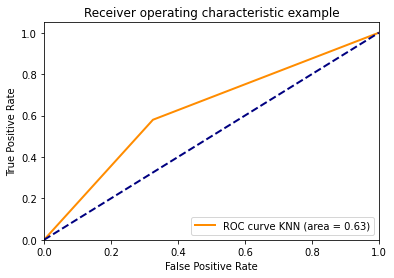

In [40]:
drawROCCurves(['KNN'],[predictionsKNN],testLabels)

##### Ejercicio

Utilizando la función anterior genera la curva ROC de todos los clasificadores que has definido anteriormente.

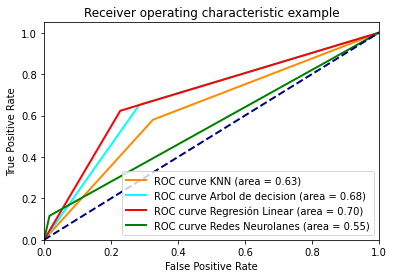

In [41]:
drawROCCurves(['KNN', 'Arbol de decision', 'Regresión Linear', 'Redes Neurolanes'],[predictionsKNN, predictionsArbol, predictionsLR, predictionsMultiLayer],testLabels)

### 5. Estudio estadístico

Lo último que vamos a ver en esta parte es cómo realizar un estudio estadístico basado en lo que vimos en clase, para ello utilizaremos la función `compare_methods` disponible en el módulo StatisticalAnalysis. Comienza instalando este módulo usando `pip`.

In [42]:
!pip install StatisticalAnalysis

  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.5-py2.py3-none-any.whl size=13122 sha256=0b5d7b3566230d5d93c037f119f81be60274efac0bc68d039bdcc4f647c26a48
  Stored in directory: /root/.cache/pip/wheels/37/d7/b4/16b0207c2fe82f25f64c17e61c8c2027aea5fad65d059c2394
Successfully built StatisticalAnalysis


In [43]:
from StatisticalAnalysis import compare_methods

Para utilizar este método debemos comenzar indicando los algoritmos a utilizar y las distribuciones de los hiperparámetros a optimizar. Vamos a utilizar los 5 modelos vistos hasta ahora: árboles de decisión, SVMs, KNN, Regresión logística y red neuronal, así que definimos estos modelos y los parámetros a optimizar.

In [44]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

Creamos tres listas que contendrán respectivamente:

(1) Los algoritmos:

In [45]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

(2) Los parámetros a optimizar:

In [46]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]

(3) Los nombres de los algoritmos:

In [47]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

Invocamos a la función `compare_methods` pasándole el dataset completo, el conjunto de etiquetas completo, las tres listas definidas anteriormente, y la métrica. Los valores válidos
para la métrica son accuracy, precision, recall, f1 o auroc. Al invocar a la función anterior se producirá un informe de resultados. 

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.690822 (0.063171)
SVM: 0.690542 (0.063782)
KNN: 0.675659 (0.052745)
LR: 0.732618 (0.058448)
MLP: 0.698607 (0.056458)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.967795, p:0.187994
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.516977, p:0.723608
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

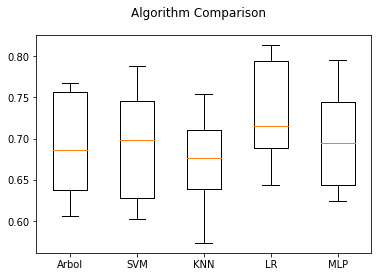

In [48]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

##### Preguntas

¿Qué tipo de tests se ha aplicado? ¿Paramétrico o no paramétrico? ¿por qué?

Respuesta. 

Se ha aplicado el test Friedman.

No paramétrico ya que la hipótesis nula de la normalidad ha sido rechazada



¿Cuál ha sido el modelo ganador?

Respuesta. 

LR

¿Hay diferencias significativas con los otros modelos?

Respuesta. 

Sí, con el resto de modelos tiene diferencias significativas

## Evaluando la clasificación multiclase

Todo lo que hemos visto para clasificación binaria también puede ser aplicado a la clasificación multiclase.

### 0. Carga de datos

Carga los datos del fichero iris.csv como hemos hecho en prácticas anteriores.

In [49]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2022-04-06 13:41:06--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-04-06 13:41:06 (55.5 MB/s) - ‘iris.csv’ saved [4606/4606]



In [50]:
df = pd.read_csv('iris.csv')

In [51]:
Xiris = df.values[:, :-1]
Yiris = df.values[:, -1]

### 1. Partición de conjunto de entrenamiento y de test

Al igual que antes partimos el conjunto de datos en entrenamiento y test utilizando la función `train_test_split`.

In [52]:
(trainIrisData, testIrisData, trainIrisLabels, testIrisLabels) = train_test_split(Xiris,Yiris,test_size=0.25, random_state=42)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

En este caso vamos a entrenar un modelo KNN y seleccionar el hiperparámetro k utilizando el proceso de validación cruzada.

In [53]:
for k in range(1,26,2):
    modelKNNIris = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNNIris,trainIrisData,trainIrisLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))


modelKNNIris = KNeighborsClassifier(n_neighbors=3)
modelKNNIris.fit(trainIrisData,trainIrisLabels)

k=1, Precisión: 0.94 (+/- 0.14)
k=3, Precisión: 0.95 (+/- 0.14)
k=5, Precisión: 0.95 (+/- 0.14)
k=7, Precisión: 0.94 (+/- 0.14)
k=9, Precisión: 0.94 (+/- 0.14)
k=11, Precisión: 0.95 (+/- 0.15)
k=13, Precisión: 0.95 (+/- 0.15)
k=15, Precisión: 0.95 (+/- 0.15)
k=17, Precisión: 0.95 (+/- 0.15)
k=19, Precisión: 0.94 (+/- 0.14)
k=21, Precisión: 0.94 (+/- 0.14)
k=23, Precisión: 0.93 (+/- 0.16)
k=25, Precisión: 0.94 (+/- 0.14)


KNeighborsClassifier(n_neighbors=3)

### 3. Evaluando los algoritmos en el conjunto de test

In [54]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNNIris = modelKNNIris.predict(testIrisData)
print(classification_report(testIrisLabels, predictionsKNNIris))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



En este caso las curvas ROC no tienen tanto sentido, pero sí que puede ser útil la matriz de confusión.

In [55]:
print("MATRIZ DE CONFUSIÓN USANDO KNN")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testIrisLabels, predictionsKNNIris))

MATRIZ DE CONFUSIÓN USANDO KNN
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


##### Ejercicio
Repite el estudio estadístico hecho en el caso binario, utilizando como  métrica la accuracy.

In [56]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

In [57]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

In [58]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]

In [59]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.946667 (0.049889)
SVM: 0.973333 (0.044222)
KNN: 0.960000 (0.053333)
LR: 0.960000 (0.053333)
MLP: 0.953333 (0.066999)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.731743, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.181818, p:0.946651
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

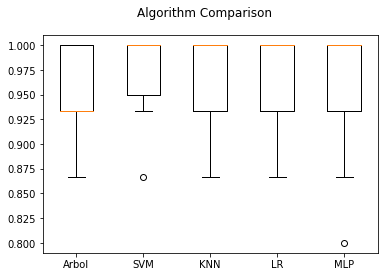

In [60]:
compare_methods(Xiris,Yiris,listAlgorithms,listParams,listNames,metric='accuracy')

##### Preguntas

¿Qué tipo de test se ha aplicado? ¿Paramétrico o no paramétrico? ¿Ha habido algún clasificador que es significativamente mejor que el resto? ¿Cuál?



Respuesta.

El test de Friedman, el cuál es un test no paramétrico.

Sí, el SVM

Guarda este fichero con tus soluciones a los distintos ejercicios usando la opción *"Save in Github..."*. 